In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
data=pd.read_csv('C:/Users/Taha/Downloads/candy-data.csv')
data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
data.shape

(85, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


# No missing values

In [5]:
data.isnull().any()

competitorname      False
chocolate           False
fruity              False
caramel             False
peanutyalmondy      False
nougat              False
crispedricewafer    False
hard                False
bar                 False
pluribus            False
sugarpercent        False
pricepercent        False
winpercent          False
dtype: bool

# Rename some columns

In [6]:
data.columns=['CandyName' ,'chocolate','fruity','caramel','peanutyAlmondy','nougat','crispedRiceWafer', 'hard' , 'bar' , 'pluribus','sugarPercent','pricePercent','winPercent']
data.head()

,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


 # chocolate or not count

In [7]:
data['chocolate'].value_counts()

0    48
1    37
Name: chocolate, dtype: int64

# Percent of 0 or 1 in every column 

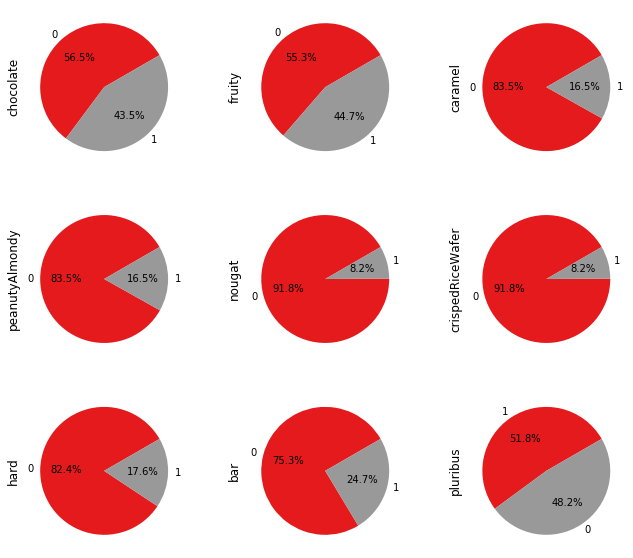

In [8]:
plt.figure(figsize=(10,10))
for i in np.arange(1,10):
    plt.subplot(3,3,i ) #title=data.columns[i]
    data[data.columns[i]].value_counts().plot.pie(autopct='%1.1f%%' ,cmap='Set1', startangle=30  )

# outliers & countplot columns 

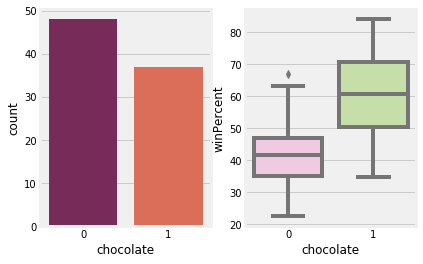

In [9]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['chocolate'], palette='rocket',ax=ax[0])
sns.boxplot(x='chocolate',y='winPercent',palette='PiYG',data=data, ax=ax[1])

# show outliers of  not chocolate and winning

In [10]:
data[data['chocolate']==0][data['winPercent']>62]

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.22,63.085140
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.22,67.037628


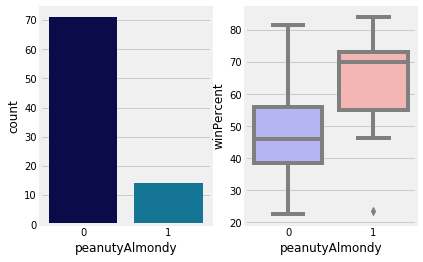

In [11]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['peanutyAlmondy'], palette='ocean',ax=ax[0])
sns.boxplot(x='peanutyAlmondy',y='winPercent',palette='bwr',data=data, ax=ax[1])


# show outliers of  almonds and winning

In [12]:
data[data['peanutyAlmondy']==1 ][data['winPercent']<30]

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


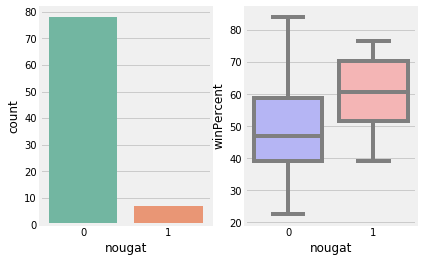

In [13]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['nougat'], palette='Set2',ax=ax[0])
sns.boxplot(x='nougat',y='winPercent',palette='bwr',data=data, ax=ax[1])

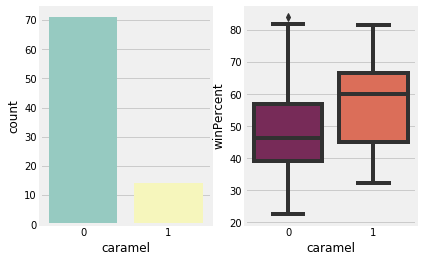

In [14]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['caramel'], palette='Set3',ax=ax[0])
sns.boxplot(x='caramel',y='winPercent',palette='rocket',data=data, ax=ax[1])


# show outliers of  not caramel and winning

In [15]:
data[data['caramel']==0 ][data['winPercent']>82]

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.72,0.651,84.18029


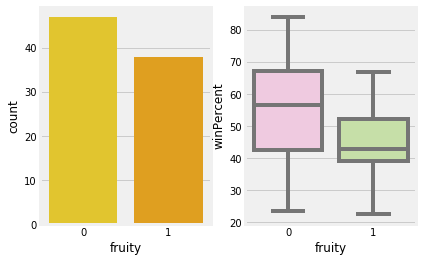

In [16]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['fruity'], palette='Wistia',ax=ax[0])
sns.boxplot(x='fruity',y='winPercent',palette='PiYG',data=data, ax=ax[1])

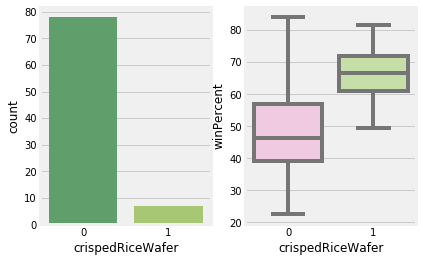

In [17]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['crispedRiceWafer'], palette='summer',ax=ax[0])
sns.boxplot(x='crispedRiceWafer',y='winPercent',palette='PiYG',data=data, ax=ax[1])

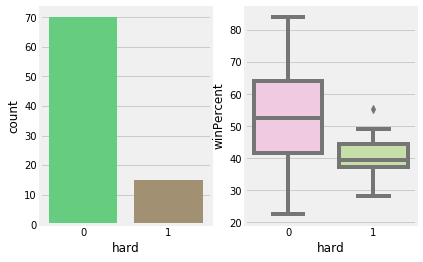

In [18]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['hard'], palette='terrain',ax=ax[0])
sns.boxplot(x='hard',y='winPercent',palette='PiYG',data=data, ax=ax[1])

# show outliers of  hard and winning

In [19]:
data[data['hard']==1 ][data['winPercent']>50]

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046


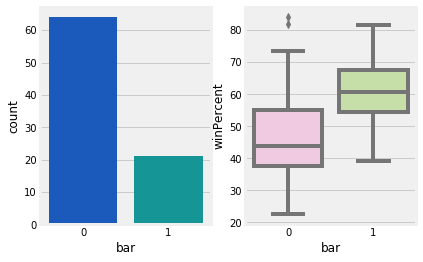

In [20]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['bar'], palette='winter',ax=ax[0])
sns.boxplot(x='bar',y='winPercent',palette='PiYG',data=data, ax=ax[1])

# show outliers of  not candy bar and winning

In [21]:
data[data['bar']==0 ][data['winPercent']>80]

C:\Users\Taha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,CandyName,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
52,ReeseÕs Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290


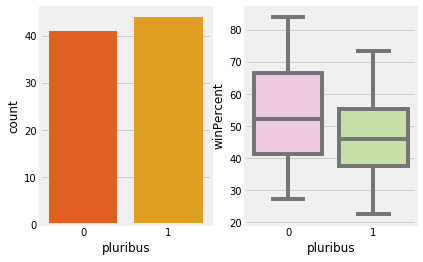

In [22]:
fig,ax=plt.subplots(1,2,figsize=(6,4))
sns.countplot(data['pluribus'], palette='autumn',ax=ax[0])
sns.boxplot(x='pluribus',y='winPercent',palette='PiYG',data=data, ax=ax[1])

# Corrlation matrix

In [23]:
data.corr()

,chocolate,fruity,caramel,peanutyAlmondy,nougat,crispedRiceWafer,hard,bar,pluribus,sugarPercent,pricePercent,winPercent
chocolate,1.000000,-0.741721,0.249875,0.377824,0.254892,0.341210,-0.344177,0.597421,-0.339675,0.104169,0.504675,0.636517
fruity,-0.741721,1.000000,-0.335485,-0.399280,-0.269367,-0.269367,0.390678,-0.515066,0.299725,-0.034393,-0.430969,-0.380938
caramel,0.249875,-0.335485,1.000000,0.059356,0.328493,0.213113,-0.122355,0.333960,-0.269585,0.221933,0.254327,0.213416
peanutyAlmondy,0.377824,-0.399280,0.059356,1.000000,0.213113,-0.017646,-0.205557,0.260420,-0.206109,0.087889,0.309153,0.406192
nougat,0.254892,-0.269367,0.328493,0.213113,1.000000,-0.089744,-0.138675,0.522976,-0.310339,0.123081,0.153196,0.199375
crispedRiceWafer,0.341210,-0.269367,0.213113,-0.017646,-0.089744,1.000000,-0.138675,0.423751,-0.224693,0.069950,0.328265,0.324680
hard,-0.344177,0.390678,-0.122355,-0.205557,-0.138675,-0.138675,1.000000,-0.265165,0.014532,0.091810,-0.244365,-0.310382
bar,0.597421,-0.515066,0.333960,0.260420,0.522976,0.423751,-0.265165,1.000000,-0.593409,0.099985,0.518407,0.429929
pluribus,-0.339675,0.299725,-0.269585,-0.206109,-0.310339,-0.224693,0.014532,-0.593409,1.000000,0.045523,-0.220794,-0.247448
sugarPercent,0.104169,-0.034393,0.221933,0.087889,0.123081,0.069950,0.091810,0.099985,0.045523,1.000000,0.329706,0.229151


#  Heatmap between corr features

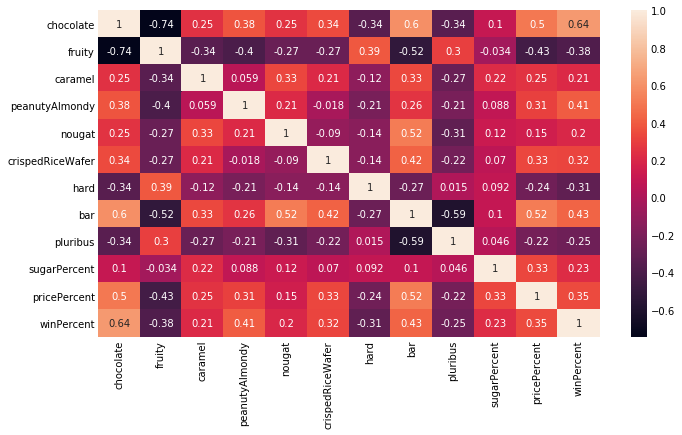

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True )

# Separating dependant and independant columns

In [25]:
y=data['chocolate']

In [26]:
X=data.iloc[:,2:]

# feature slection

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
ex=ExtraTreesClassifier()

In [28]:
ex.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [29]:
print(ex.feature_importances_)

[0.35695862 0.01797953 0.04496916 0.02046568 0.02334553 0.03921844
 0.11307453 0.03607488 0.08236838 0.08527834 0.1802669 ]


# the 10 most important variables 

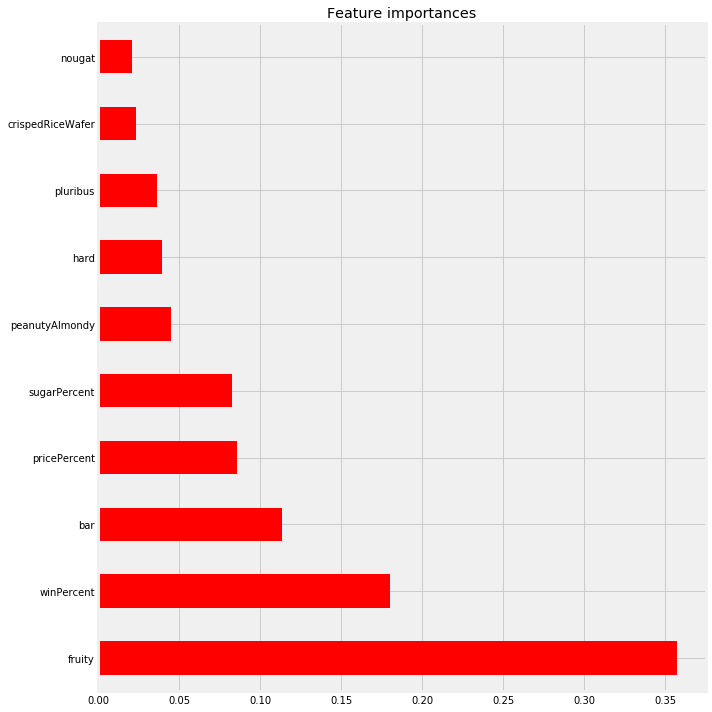

In [30]:
plt.figure(figsize=(10,10))
plt.title('Feature importances')
feat=pd.Series(ex.feature_importances_,index=X.columns)
feat.nlargest(10).plot(kind='barh', color="r", align="center")
plt.tight_layout()
plt.show()

# Dividing dataset to train and test

In [31]:
from sklearn.model_selection import train_test_split


In [32]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state =3)

# Logistic regression 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
reg=LogisticRegression()

# fit the model

In [35]:
reg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# prediction

In [36]:
y_pred=reg.predict(X_test)

# get the predictions using the classifier we had fit above
# calculate accuracy score

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         5

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17



In [39]:
confusion_matrix(y_test,y_pred)

array([[12,  0],
       [ 0,  5]], dtype=int64)

# another way 

In [40]:
pd.crosstab(y_test ,y_pred  , rownames=['True'] , colnames=['Predictions'] , margins=True)


Predictions,0,1,All
True,,,
0,12,0,12
1,0,5,5
All,12,5,17


# plot confusion matrix
# model predicted 12 candy haven't the chocolate and in real they it true
# model predicted that 5 candy have chocolate and in real it true

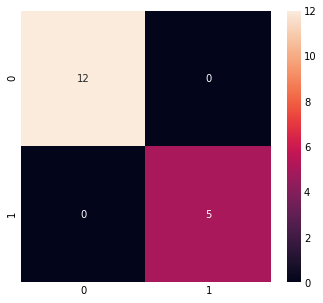

In [41]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

# accuracy 100% عشان انا جامد

In [42]:
reg.score(X_test,y_test)

1.0

# اطفأني 😢